# Histogram equalization
Histogram equalization enhances the contrast of an image by spreading the pixel histogram values

We will take a look at "Contrast Limited Adaptive Histogram Equalization (CLAHE)":
- Adaptive histogram equalization divides image into small blocks (8x8 tiles default in opencv)
- Each block is histogram equalized
- To minimize noise amplification, contrast limiting is applied (default 40 in opencv)

In [22]:
import cv2
import matplotlib.pyplot as plt

from skimage import io

In [23]:
img = cv2.imread("../inpdata/images/sandstone_low_contrast.tif", 1)
img.shape

(481, 674, 3)

In [24]:
# now we will convert rgb to lab. this will give us luminance channel over which we will perform equalization
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [25]:
l, a, b = cv2.split(lab_img)

In [26]:
# histogram equalization over luminance channel
equ = cv2.equalizeHist(l)

In [27]:
upd_lab_img = cv2.merge((equ, a, b))
eq_img = cv2.cvtColor(upd_lab_img, cv2.COLOR_LAB2RGB)

In [28]:
# clahe
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(l)
upd_lab_img2 = cv2.merge((clahe_img, a ,b))
eq_img2 = cv2.cvtColor(upd_lab_img2, cv2.COLOR_LAB2RGB)

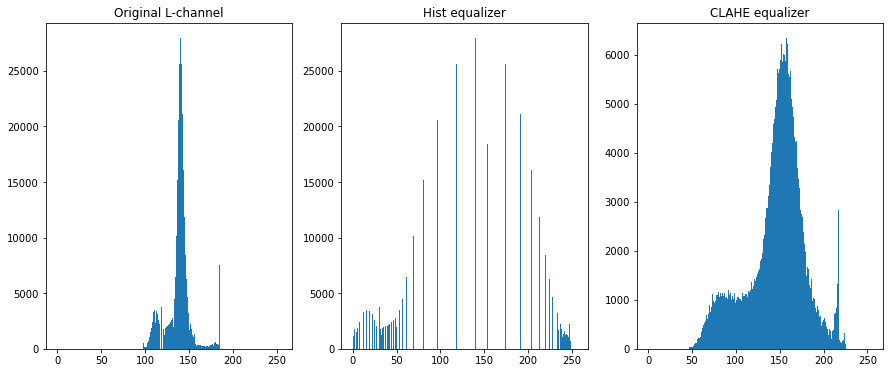

In [29]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
axs.flatten()[0].hist(l.flat, bins=256, range=(0, 255))
axs.flatten()[0].title.set_text("Original L-channel")

axs.flatten()[1].hist(equ.flat, bins=256, range=(0, 255))
axs.flatten()[1].title.set_text("Hist equalizer")


axs.flatten()[2].hist(clahe_img.flat, bins=256, range=(0, 255))
axs.flatten()[2].title.set_text("CLAHE equalizer")

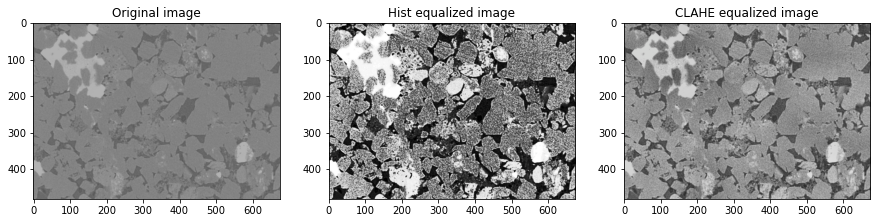

In [31]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
axs.flatten()[0].imshow(img)
axs.flatten()[0].title.set_text("Original image")

axs.flatten()[1].imshow(eq_img)
axs.flatten()[1].title.set_text("Hist equalized image")


axs.flatten()[2].imshow(eq_img2)
axs.flatten()[2].title.set_text("CLAHE equalized image")